In [2]:
#Load Data
import pandas as pd
dataset = pd.read_csv("iphone_purchase_records.csv")
dataset.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [3]:
#Separating the dataset into features(X) and target (y)
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, 3].values

In [4]:
#since gender is a categorical variable, we convert it to a numerical one
from sklearn.preprocessing import LabelEncoder
labelEncoder_gender =  LabelEncoder()
X[:,0] = labelEncoder_gender.fit_transform(X[:,0])

In [5]:
#the features have been converted to numerical ones
print(X)

[[1 19 19000]
 [1 35 20000]
 [0 26 43000]
 ...
 [0 50 20000]
 [1 36 33000]
 [0 49 36000]]


In [6]:
#Split into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Why do we need feature scaling in KNN?

Since we use different features with different ranges of numbers to predict the target variable, larger numbers might skew the data towards a particular direction and cause a problem with the calculation of the target. This matters specially in KNN because the algorithm uses the euclidian distance between each variable to calculate whether the target belongs to a particular cluster. A skewed spread might bias this decision. Hence, it is necessary to normalize (feature scale) the data before applying the KNN algorithm.


In [7]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [8]:
#Fit KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
# metric = minkowski and p=2 is Euclidean Distance
# metric = minkowski and p=1 is Manhattan Distance
classifier = KNeighborsClassifier(n_neighbors=5, metric="minkowski",p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [9]:
#Make Prediction
y_pred = classifier.predict(X_test)

In [10]:
#Confusion Matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred) 
print(cm)
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, y_pred) 
print("Precision score:",precision)
recall = metrics.recall_score(y_test, y_pred) 
print("Recall score:",recall)

[[64  4]
 [ 3 29]]
Accuracy score: 0.93
Precision score: 0.8787878787878788
Recall score: 0.90625


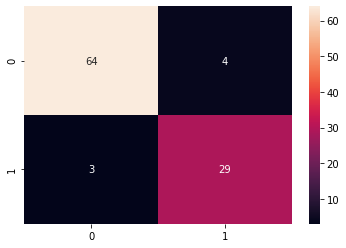

In [11]:
#visualizing confusion matrix
import seaborn as sns
sns.heatmap(cm, annot=True)

# What is a confusion matrix
The confusion matrix is a 2 dimensional array comparing predicted category labels to the true label. For binary classification, these are the True Positive, True Negative, False Positive and False Negative categories.

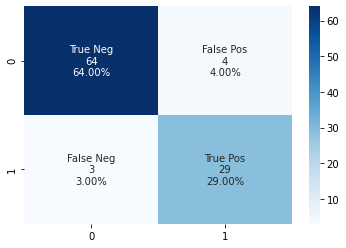

In [19]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')